In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'C:/Users/USER/Desktop/projects/encryptix/Titanic-Dataset.csv'
titanic_df = pd.read_csv(url)

In [3]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**DATA CLEANING**

In [4]:
# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:

titanic_df['CabinKnown'] = titanic_df['Cabin'].notnull().astype(int)

In [6]:

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20884\2591634047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [7]:
# Fill missing Age values 
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20884\3671920458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [8]:
#  Correct data types if necessary
titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

In [9]:
# remove duplicates
titanic_df.drop_duplicates(inplace=True)

**Exploratory Data Analysis (EDA)**

In [10]:

print(titanic_df.describe(include='all'))

        PassengerId  Survived  Pclass                     Name   Sex  \
count    891.000000     891.0   891.0                      891   891   
unique          NaN       2.0     3.0                      891     2   
top             NaN       0.0     3.0  Braund, Mr. Owen Harris  male   
freq            NaN     549.0   491.0                        1   577   
mean     446.000000       NaN     NaN                      NaN   NaN   
std      257.353842       NaN     NaN                      NaN   NaN   
min        1.000000       NaN     NaN                      NaN   NaN   
25%      223.500000       NaN     NaN                      NaN   NaN   
50%      446.000000       NaN     NaN                      NaN   NaN   
75%      668.500000       NaN     NaN                      NaN   NaN   
max      891.000000       NaN     NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   891.000000  891.000000  891.000000     891  891.0000

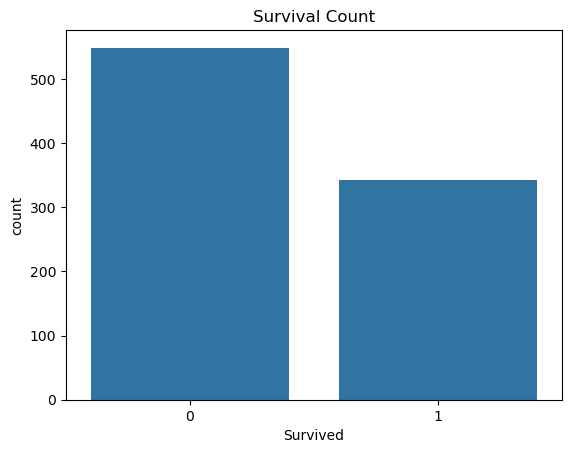

In [11]:
# Count plot of survival
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

INFERENCES
Majority of passegers did not survive

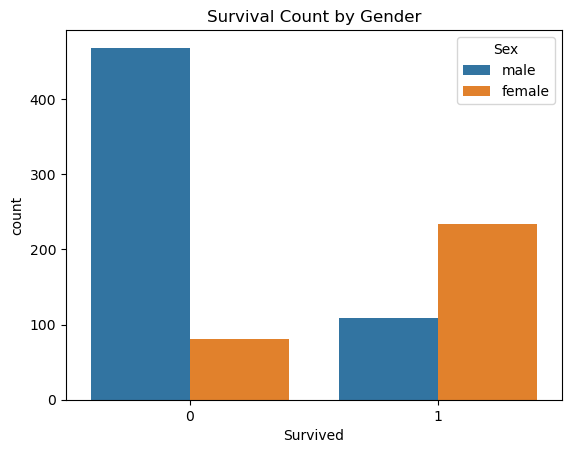

In [12]:
# Count plot of survival by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

INFERENCES: majority of passengers that survived is female.
            The count of males was greater than that of females

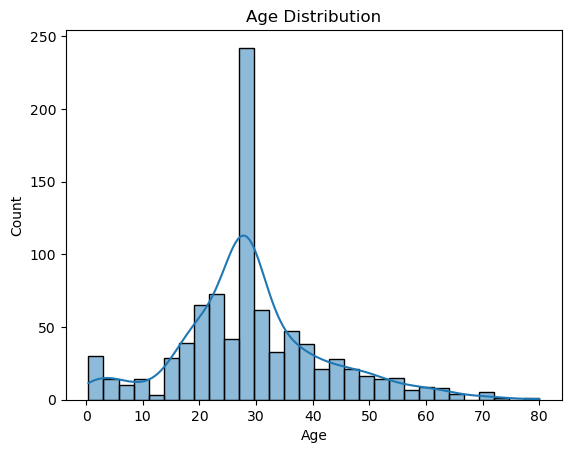

In [13]:
# Distribution of age
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

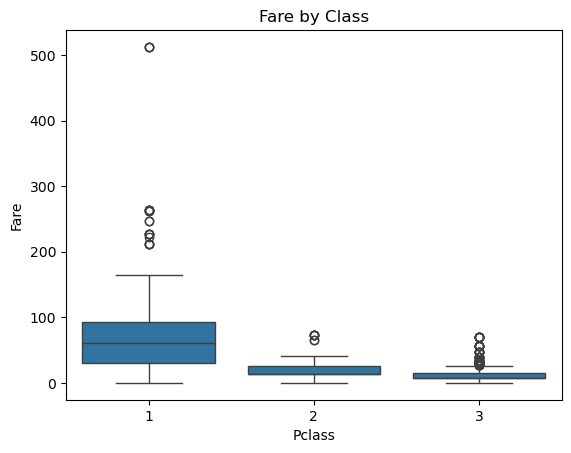

In [14]:
# Box plot of fare by class
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare by Class')
plt.show()

INFERENCES:Higher Class Passengers Paid More

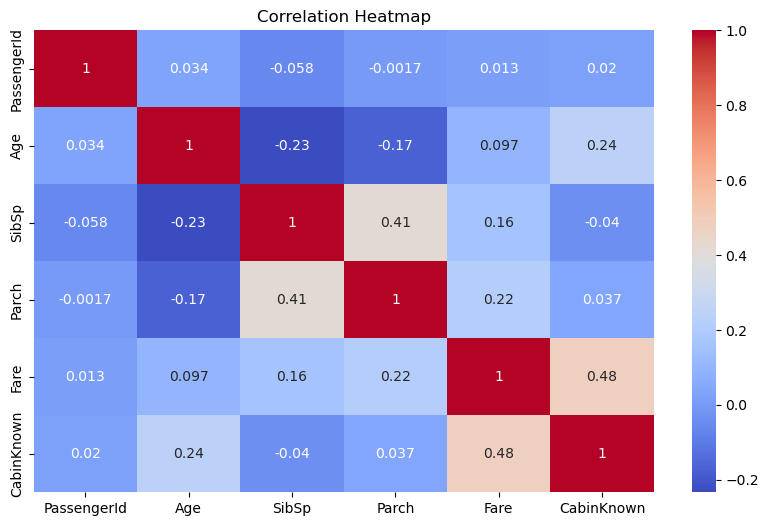

In [15]:
# 3. Correlation Heatmap

numeric_df = titanic_df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

INFERENCES:Positive Correlation between Fare and Passenger Class,Positive Correlation between SibSp and Parch